# 5 - A Distribuição Amostral das Médias e z para uma média amostral

Este material foi traduzido e adaptado de {cite}`carlson2017introduction`.

OBJETIVOS DE APRENDIZADO:

Depois de ler este capítulo, você será capaz de:
 
- Explicar como uma distribuição de médias amostrais é criada;
- Explicar como uma amostra aleatória é obtida; 
- Determinar a média, o desvio padrão e a forma de uma distribuição de médias amostrais;
- Explicar qual é o erro padrão das medidas médias; 
- Explicar o teorema central do limite e por que ele é importante; 
- Explicar a lei dos grandes números; 
- Calcular z para uma média amostral; 
- Usar z para uma média amostral e uma tabela de probabilidades para distribuição normal para determinar a probabilidade de uma dada média amostral ocorrer.

## Amostragem e Erro de Amostragem

Na maioria das aplicações da estatística, queremos aprender sobre populações completas, mas frequentemente, é impraticável estudar populações inteiras. Consequentemente, estudamos uma amostra e inferimos que os resultados da amostra representam o que encontraríamos estudando toda a população. O uso de estatísticas obtidas de amostras para inferir parâmetros populacionas é o escopo da estatística inferencial. Embora absolutamente necessário, o desafio da estatística inferencial é a introdução de erros de amostragem. O erro de amostragem ocorre quando as características da amostra diferem das características da população. Como estudado anteriormente, existem técnicas de amostragem que se adequam a diferentes cenários. Se a população tem, por exemplo, divisões naturais de uma variável que afeta o parâmetro que está sendo medido, a amostragem deve ser feita proporcionalmente dentro das divisões. Como exemplo, se uma população é composta por 75% de mulheres com idade média de 21 anos, a amostra usada em uma investigação desta população também deve consistir de 75% do sexo feminino, com idade média de 21 anos. Representar uma população específica com uma amostra pobre levará a resultados não representativos da população. Portanto, obter uma amostra representativa que minimize o erro de amostragem é extremamente importante.

In [1]:
# HIDE CODE
from jupyterquiz import display_quiz
#display_quiz("questions.json", preserve_responses = True)
display_quiz("question1.json")

<IPython.core.display.Javascript object>

Suponha que a Dra. Joana queira estudar como o envelhecimento afeta a memória prospectiva (ou seja, a memória de alguém para realizar tarefas futuras, como levar o lixo para fora antes das 8h, tomar um comprimido às 14h ou ir a uma consulta às 16h). A Dra. Joana vai a um centro local para idosos e encontra 25 pessoas, entre as idades de 65 e 80 anos, que concordam em participar de seu estudo na próxima terça-feira às 15h. No entanto, apenas 10 dessas 25 pessoas se lembram de comparecer ao estudo. Claramente, concluir que os resultados de apenas quem se lembrou de comparecer representem toda a população é problemático. Talvez as pessoas que se lembraram de comparecer tenham melhores habilidades de memória prospectiva do que aqueles que se esqueceram de aparecer. Neste caso, o procedimento de amostragem da Dra. Joana foi ruim, ela acabou com uma amostra não representativa de pessoas idosas.

O erro de amostragem também é conhecido como erro padrão da média (SEM), e sua fórmula é dada por

$\sigma_{\bar{x}} = SEM = \frac{\sigma}{\sqrt{N}}$

Assim, existem apenas duas coisas que contribuem para o erro amostral: o desvio padrão da população e o tamanho da amostra. À medida que $\sigma$ aumenta, o SEM também aumenta. À medida que o tamanho da amostra aumenta, o SEM diminui. Em geral, os investigadores têm muito menos controle sobre o desvio padrão da população do que sobre o tamanho da amostra e, portanto, os esforços para reduzir o erro amostral tendem a se concentrar no aumento do tamanho da amostra.

Embora a redução do erro amostral seja importante, você também deve pesar os custos e os retornos decrescentes de obter amostras cada vez maiores ao decidir o tamanho da amostra do seu estudo. Neste exemplo, aumentar o tamanho da amostra de 10 a 40 reduz o erro amostral pela metade. No entanto, para reduzir o erro de amostragem pela metade novamente, você teria que adicionar outras 120 pessoas para a amostra.

**Relacionamento entre Tamanho da amostra e Erro de amostragem com $\sigma = 100$**

Tamanho da amostra | Erro de amostragem
-- | --
10 | 31.62
20 | 20.36
40 | 15.81
80 | 11.18
160 | 7.91
320 | 5.59
640 | 3.95
1280 | 2.80
2560 | 1.98

## Distribuição Amostral da média

Calcular a quantidade de erro de amostragem esperado em um estudo não é difícil. Você simplesmente divide $\sigma$ pela raiz quadrada do tamanho da amostra (N). No entanto, para entender por que essa fórmula simples de erro de amostragem funciona, você deve entender as distribuições amostrais. Uma distribuição de médias amostrais é a população de todas as médias amostrais aleatórias possíveis para um estudo realizado com um determinado tamanho de amostra.

Para ilustrar o que significa uma distribuição amostral, trabalharemos com uma população muito pequena de quatro valores: 10, 12, 14, 16. Se você gerar esta lista completa de amostras possíveis, você terá todas as 16 amostras aleatórias possíveis da população de quatro valores, quando N = 2.

**Distribuição de médias amostrais para a população de quatro valores e um tamanho de amostra de 2**
| Amostra | 1° valor | 2° valor | Média |
|---------|----------|----------|-------|
| A       | 10       | 10       | 10    |
| B       | 10       | 12       | 11    |
| C       | 10       | 14       | 12    |
| D       | 10       | 16       | 13    |
| E       | 12       | 10       | 11    |
| F       | 12       | 12       | 12    |
| G       | 12       | 14       | 13    |
| H       | 12       | 16       | 14    |
| I       | 14       | 10       | 12    |
| J       | 14       | 12       | 13    |
| K       | 14       | 14       | 14    |
| L       | 14       | 16       | 15    |
| M       | 16       | 10       | 13    |
| N       | 16       | 12       | 14    |
| O       | 16       | 14       | 15    |
| P       | 16       | 16       | 16    |

In [3]:
# HIDE CODE
import matplotlib.pyplot as plt
from itertools import product, combinations
from collections import Counter

vars = [10, 12, 14, 16]
N = 2
amostras = list(product(vars, repeat=N))
medias = []

for a in amostras:
  medias.append(sum(a)/N)

plt.bar(Counter(medias).keys(), Counter(medias).values())
plt.title('Distribuição de médias amostrais para amostras de tamanho 2 em uma população de 4 variáveis')

ModuleNotFoundError: No module named 'matplotlib'

Agora você pode começar a apreciar as relações especiais entre a população original de vairáveis e a distribuição das médias amostrais. Você começou com uma população de quatro valores: 10, 12, 14 e 16. A média desta população foi 

$\mu = \frac{1}{N}\sum_{i=1}^{N}x_i = \frac{52}{4} = 13$

A média da distribuição das médias amostrais isto é, das 16 médias amostrais na última coluna da Tabela 5.2 (ou seja, 10, 11, 12, 13, 11, etc.), também é 13, conforme ilustrado abaixo:

$\bar{X}= \frac{1}{N}\sum_{i=1}^{N}\bar{x}_i = \frac{208}{16} = 13$

Assim, a média da distribuição das médias amostrais é igual à média da população. Essa observação sempre será verdade. O fato de a média da distribuição das médias amostrais ser sempre igual à média da população original mostra que quando os pesquisadores selecionam aleatoriamente uma amostra para usar em seus estudos, selecionar uma amostra que tenha a mesma média da população, ou uma média próxima a ela, é bastante comum. O gráfico de barras de frequência da distribuição das médias amostrais na Figura 5.1 facilita verificar por quê. As médias amostrais que estão próximas da média populacional de 13 são comuns, e as médias amostrais distantes da média populacional são relativamente raras. Em outras palavras, médias amostrais com baixos erros amostrais são comuns, e aquelas com muitos erros amostrais são raras. Outro aspecto digno de nota da relação entre a população original de variáveis e a distribuição das médias amostrais é a relação sistemática entre o desvio padrão do população e o desvio padrão da distribuição das médias amostrais. O desvio padrão da população original (ou seja, 10, 12, 14, 16) foi:

Primeiro a variância da população pode ser obtida por

$\sigma^2 = \frac{1}{N}\sum_{i=1}^N x_i^2 - \mu^2=\frac{1}{4}696-169=5$

E o desvio padrão

$\sigma= \sqrt{\sigma^2} = 2.24$

Se calcularmos o desvio padrão da distribuição das médias amostrais, isso revelará a distância típica entre as possíveis médias amostrais e a média populacional. Esta é a medida de erro amostral. Abaixo estão os cálculos para o desvio padrão da distribuição das médias amostrais, começando com a variância. Observe que o N na equação da variância se refere ao número de médias amostrais (ou seja, 16).
A variância da distribuição amostral pode ser obtida por

$Var(X) = \frac{1}{N}\sum_{i=1}^N \bar{x}_i^2 - \bar{X}^2=\frac{1}{16}2744-169=2.5$

E o desvio padrão

$DP = \sqrt{Var(X)} = 1.58$

Em praticamente todas as situações de pesquisa nas ciências farmacêuticas, você deve trabalhar com populações e tamanhos de amostra muito maiores; consequentemente, é impossível realmente criar uma lista de todas as médias amostrais possíveis (ou seja, a distribuição da amostral da média) como fizemos neste exemplo. Felizmente, você não precisa. Em vez de criar uma lista de todas as possíveis amostras e depois encontrar seu desvio padrão, você pode usar a fórmula simples que apresentamos no início do capítulo para calcular o erro amostral típico do seu estudo, chamado SEM ou erro padrão da média.
O desvio padrão para a população (ou seja, 10, 12, 14, 16) foi 2,24. O N refere-se ao tamanho da amostra, não ao número de amostras na distribuição das médias amostrais. Assim, o SEM é

$SEM_p = \frac{\sigma}{\sqrt{N}} = \frac{2.24}{\sqrt{2}}=1.58$

Agora sabemos que a média da distribuição das médias amostrais é sempre igual à média populacional, $\mu$, e o desvio padrão é sempre igual ao SEM, isto é, a $\sigma/\sqrt{N}$. A última coisa que precisamos saber sobre a distribuição das médias amostrais é a sua forma. Se você criar um gráfico da distribuição amostral, como foi feito na Figura 5.1, você verá que ele tem distribuição aproximadamente normal (ou seja, em forma de sino). Você também pode olhar o gráfico e ver que as médias amostrais se aglomeram em torno da média populacional, de 13. Todas as distribuições de médias amostrais terão uma forma normal se a população original das variáveis tem uma forma normal. Neste caso, a nossa população de quatro variáveis não tinha uma forma normal, mas a distribuição das médias amostrais se aproximou de uma forma normal. Em geral, conforme o tamanho da amostra aumenta, a distribuição das médias amostrais será mais próxima de uma normal. Se a população original for apenas levemente distorcida, a distribuição das médias amostrais será normalmente distribuída com uma amostra de tamanho bastante pequena (por exemplo, 10), mas quando a população original de valores é altamente distorcida ou tem valores discrepantes extremos, você precisa de um tamanho de amostra maior (por exemplo, 40) para obter uma distribuição normal das médias amostrais. Como muitas vezes não sabemos como é a população original, os estatísticos usam 30 como uma estimativa aproximada do tamanho da amostra necessário para obter uma distribuição normal das médias amostrais. Essa normalidade característica da distribuição das médias amostrais é importante porque as curvas normais nos permitem fazer declarações de probabilidade sobre qualquer valor nessas curvas, tal como fizemos no capítulo anterior.

Coletivamente, esses três fatos são conhecidos como teorema central do limite  (TCL) e nos dizem que a distribuição das médias amostrais com centro ($\mu$) e dispersão ($SEM = \sigma/\sqrt{N}$) tem forma normal para qualquer estudo. O TCL é poderoso porque (1) sugere que as amostras tendem a ter médias semelhantes às da população da qual foram extraídas e (2) nos permite calcular a quantidade típica de erro de amostragem que qualquer estudo pode gerar.

In [3]:
# HIDE CODE
display_quiz("question2.json")

<IPython.core.display.Javascript object>

Existem duas maneiras de reduzir o erro de amostragem. Uma opção é reduzir o desvio padrão populacional ($\sigma$), mas esta opção raramente é possível. Uma opção muito mais viável é aumentar o tamanho da amostra. À medida que N aumenta, o erro padrão geral da média diminuirá. Amostras maiores tenderão a ter meios que desviam-se menos da média da população do que amostras menores. Este é um exemplo específico da lei de números grandes: à medida que N aumenta, a estatística amostral (por exemplo, a média amostral) é uma estimativa melhor do parâmetro populacional (por exemplo, a média populacional).

Visto que a distribuição tem forma normal, ela segue a regra 68–95–99, como estudado em capítulos prévios. Portanto, 68% de todas as possíveis médias amostrais estão entre -1 e +1 erro padrão da média da distribuição amostral da média.

In [4]:
# HIDE CODE
display_quiz("question3.json")

<IPython.core.display.Javascript object>

## z para uma média amostral

O TCL permite calcular o erro padrão da média, que é o erro amostral esperado de um estudo planejado. Também informa que a distribuição das médias amostrais geralmente tem formato normal. Na prática, isso significa que você pode calcular valores de z para médias amostrais, localizar essas médias em uma distribuição normal e usar uma tabela de unidades normais para determinar as probabilidades associadas a qualquer média amostral. Este procedimento estatístico permite que você faça mais do que apenas calcular o erro amostral esperado. Ele permite que você tome decisões importantes no mundo real com base em evidência estatística. A fórmula para a z para uma média amostral é muito semelhante à fórmula para a z para uma distribuição normal. Ambas as fórmulas estão abaixo.

_z_ para uma variável com distribuição normal com média e variância conhecidas: $z=\frac{X-\mu}{\sigma}$

_z_ para uma média amostral: $z=\frac{\bar{X}-\mu}{\sigma/\sqrt{N}}$

Para ambos, um valor de z próximo de zero significa que o desvio observado (ou seja, o numerador) é pequeno comparado com o desvio esperado pelo erro amostral (ou seja, o denominador). Em outras palavras, se o valor de z for “próximo” de zero, o valor (ou seja, X) ou a média amostral (ou seja, $\bar{X}$) é "próximo" da média da população. No entanto, um valor de z de 3 significa que o desvio observado (ou seja, o numerador) é três vezes maior que o desvio esperado pelo erro amostral (ou seja, o denominador). Em outras palavras, se o valor de z estiver longe de zero, o valor (ou seja, X) ou a média amostral (ou seja, $\bar{X}$) está "inexplicavelmente longe" da média da população. Valores de z grandes geralmente indicam que algo diferente da variabilidade do erro amostral fez com que o valor (ou seja, X) ou a média amostral (ou seja, M) ficasse muito longe da média populacional.


In [5]:
# HIDE CODE
display_quiz("question4.json")

<IPython.core.display.Javascript object>

<span style="color:blue">EXEMPLO</span>: Cálculo e interpretação de z para uma média amostral

O valor de z para uma média amostral permite que se tomem decisões importantes no mundo real com base em evidências estatísticas. 

Suponha que você seja um funcionário federal investigando 16 agentes de crédito em um grande banco conglomerado que você suspeita realizar práticas hipotecárias ilegais. Todos os agentes de crédito deste banco foram pagos parcialmente em comissão, e assim atividades ilegais poderiam aumentar sua renda. Olhando os registros da empresa, você descobre que a renda média de todos os agentes de crédito da empresa é $\mu = 50,000$ com um desvio padrão de $\sigma = 12,000$. Além disso, o rendimento médio dos 16 agentes de crédito suspeitos de fraude é US 55,000. Você deseja saber a probabilidade desses agentes de crédito terem uma média amostral de US 55,000 ou maior devido ao acaso (ou seja, erro de amostragem). Basicamente, você está perguntando: "Qual é a probabilidade de que a renda média dos funcionários suspeitos fosse de US 55,000 (ou seja, US 5,000 a mais que a renda média da empresa) meramente por causa de uma coincidência (ou seja, devido a um erro de amostragem)?"

_Etapa 1: calcular o desvio esperado pelo erro de amostragem_

$SEM_p = \frac{\sigma}{\sqrt{N}}= \frac{12000}{\sqrt{16}}=3000$

Isto significa que quando N = 16, a distância típica com que todas as médias amostrais possíveis se desviam da média populacional é 3,000. Quando o tamanho da amostra é 16, US 3,000 é o valor do desvio que esperamos entre qualquer média amostral e a média populacional devido a erro de amostragem. 

_Etapa 2: calcular a razão entre o desvio observado e o desvio esperado (z para uma média amostral)_

Para calcular o z para uma média amostral, divida a diferença média observada pelo valor esperado do erro amostral (ou seja, o erro padrão da média): 

$z=\frac{\bar{x}-\mu}{SEM_p}=\frac{55000-50000}{3000}=1.67$


O z de 1.67 nos diz que o desvio observado foi 1.67 vezes maior que o desvio esperado por erro amostral.

_Etapa 3: Localize o valor z na distribuição_

Depois de calcular z (ou seja, 1,67), você o localiza em uma curva z e determina se precisa procurar uma probabilidade de cauda ou corpo no Apêndice A. Você precisa considerar a pergunta que está sendo feita. Nesta situação, você quer saber a probabilidade de obter uma amostra de 16 pessoas com média de US$ 55,000 ou mais devido a erro de amostragem. Portanto, você quer saber a probabilidade da cauda referente a um valor z de 1.67 ou superior; isso é ilustrado na Figura 5.3.


Text(0.5, 1.0, 'Distribuição Z com área acima de 1.67 destacada.')

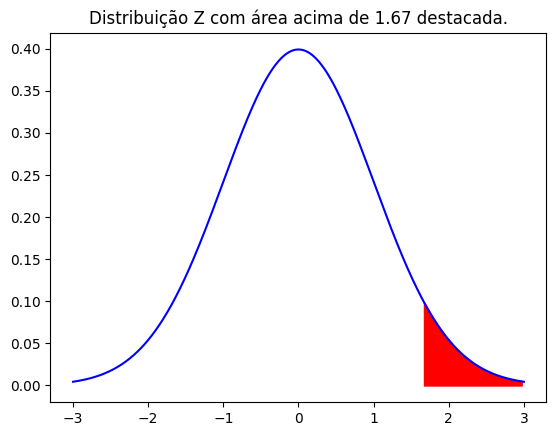

In [6]:
# HIDE CODE
import numpy as np
from scipy import stats

Z = stats.norm(0,1)

# simular valores dentro da distribuição normal N(0,1)
x=np.linspace(0-3*1, 0+3*1,1000)

plt.plot(x, Z.pdf(x), color='b')

zc = 1.67

px=np.arange(zc,0+3*1,0.1)
plt.fill_between(px, Z.pdf(px),color='r')
plt.title('Distribuição Z com área acima de 1.67 destacada.')

_Etapa 4: procure o valor de z_

Use a tabela de unidades normais para determinar a probabilidade de obter um valor de z de 1.67 ou superior devido a um erro de amostragem. A área da distribuição acima de 1.67 é a parte menor da distribuição (ou seja, menos da metade da distribuição), e então olhamos para o coluna final para o z de 1.67 e descobrimos que é 0.0475.

In [7]:
# HIDE CODE
import pandas as pd

zs = np.arange(1.63, 1.69, 0.01)
bodies = [round(Z.cdf(x), 4) for x in zs]
tails = [1-x for x in bodies]

pd.DataFrame(zip(zs, bodies, tails), columns=['z', 'Corpo', 'Cauda'])

,z,Corpo,Cauda
0,1.63,0.9484,0.0516
1,1.64,0.9495,0.0505
2,1.65,0.9505,0.0495
3,1.66,0.9515,0.0485
4,1.67,0.9525,0.0475
5,1.68,0.9535,0.0465
6,1.69,0.9545,0.0455


_Etapa 5: interprete o valor de z_

Quando o tamanho da amostra é 16, a probabilidade de obter uma renda média amostral de 55,000 ou mais é 0.0475. Outra maneira de dizer isso é que 4.75% de todas as médias amostrais possíveis baseadas em 16 pessoas têm uma média igual ou superior a US 55,000. É possível que os salários dos 16 suspeitos fossem mais elevados do que o rendimento médio da empresa meramente devido ao acaso ou coincidência, mas não é provável. Especificamente, esperaríamos obter uma média amostral aleatória de US$ 55,000 ou mais apenas em 4.75% das vezes. Portanto, é pouco provável que o rendimento médio dos 16 suspeitos tenha sido superior ao rendimento médio da empresa por mero acaso ou erro de amostragem. Talvez os salários dos funcionários fossem maiores devido a atividades ilegais. Usando seu novo conhecimento estatístico, você ajudou a garantir um mandado para a busca dos registros financeiros desses 16 suspeitos. Bom trabalho!

In [8]:
# HIDE CODE
display_quiz("question5.json")

<IPython.core.display.Javascript object>

## Prática complementar OPCIONAL

Código python: [![Abra com Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ridasilva/bioestatisca/blob/master/capitulos/chap5/cap5illustrating_sampling_distribution.ipynb)

Google Planilhas: [![Abra com Colab](./fig/google_sheet.png)](https://docs.google.com/spreadsheets/d/1Tr19IRedNYNnLEMXnlQKBlUuoXu0kr6Sx8M5Dja_EL0/edit?usp=sharing)

[Simulador da distribuição amostral online](https://onlinestatbook.com/stat_sim/sampling_dist/index.html)

## Bibliografia

```{bibliography}
```